In [12]:
"""
Has functions 'decode_image_bytes' and 'decode_image_metadata'
"""
import os
from cbor2 import dumps, loads, CBORTag, decoder
import timeit
import numpy as np
import itertools
import matplotlib.pyplot as plt
import cv2

In [94]:
INPUT_FILE = '1000000000cegr02019_0014.arf'
with open(INPUT_FILE, 'rb') as data:
    obj=loads(data.read())
dimensions = obj[1].value[0].value
image_data = obj[1].value[1].value

In [95]:
def open_cbor(filename):
    with open(filename, 'rb') as data:
        obj=loads(data.read())
    dimensions = obj[1].value[0].value
    image_data = obj[1].value[1].value
    return dimensions, image_data

In [96]:
def decode_image_bytes(image_byte_array):
    """Input: 1-D list of 8 bit two's compliment bytes 
        Operations: Converts the bytes to unsigned and decodes them
        Output: a 1-D array of 16-bit image data"""
    # Convert input to numpy array
    # Convert two's complement bytes to unsigned
    image = np.array(image_byte_array, dtype='uint8')
    # Split the unsigned bytes into segments
    bytes_array=np.array_split(image,(len(image)/2))
    holder = list()
    # Convert segements into integer values
    for x in bytes_array:
        holder.append(int.from_bytes(list(x), byteorder='big', signed=False))
    return holder

In [99]:
def decode_image_metadata(image_dimensions_bytes_array):
    """Input: 1-D list of sint64 two's complement bytes
        Operations: Converts bytes to unsigned and decodes them
        Output: Dictionary with possible values: 'width, height, channels, Z, time'"""
    # Convert input to numpy array
    # Covert two's complement bytes to unsigned
    dimensions = np.array(image_dimensions_bytes_array, dtype='uint8')
    bytes_array=np.array_split(dimensions,(len(dimensions)/8))
    # Convert the segments into integer values
    for x in range(0, len(bytes_array)):
        bytes_array[x]=int.from_bytes(list(bytes_array[x]), byteorder='big', signed=True)
    # Put the converted integer values into a dictionary
    end = dict(itertools.zip_longest(['width', 'height', 'channels', 'Z', 'time'], bytes_array, fillvalue=None))
    return end

In [100]:
dimension_data, image_data = open_cbor(INPUT_FILE)
metadata_dict = decode_image_metadata(dimension_data)
image = decode_image_bytes(image_data)

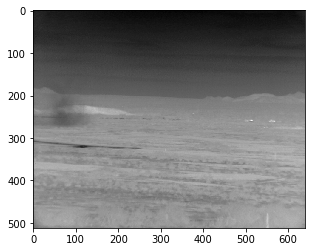

In [101]:
plt.imshow(-np.array(image).reshape(metadata_dict['height'], metadata_dict['width']), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
# Experimental Sections (Not intended for use)
#if __name__ == "__main__":
#    if os.path.isfile(file_input) == True:
#        with open(file_input, 'rb') as data:
#            obj=loads(data.read())
#        dimensions = obj[1].value[0].value
#        image_data = obj[1].value[1].value
#        decode_image_bytes(image_data)
#        decode_image_metadata(dimensions)
#    if os.path.isdir(file_input) == True: